This is the data exploration notebook for portfolio project 2.

In [1]:
#load in libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

## Code Breakdown

Data: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#time_series_covid_19_confirmed.csv

Reasons for why selected countries were selected are given in each section. Please note the graphs presented are created from available data and will be continuously updated as more data becomes available. Graphs maybe inaccurate due to many reasons. Some such reasons are delayed updates, lack of testing, under reporting, and etc.

- Global Cases and Global Deaths
- Italy Cases and Italy Deaths
- Japan Cases and Japan Deaths
- USA Cases and USA Deaths
- South Korea Cases and South Korea Deaths
- China Cases and China Deaths
- Case Comparisons and Deaths Comparisons

## Global Cases

Quick overview of global coronavirus growth

In [2]:
#read in confirmed cases data
dfConfirmed = pd.read_csv("time_series_covid_19_confirmed.csv")

In [3]:
dfConfirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [4]:
dfConfirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
count,249.00000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,...,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,22.27243,24.439131,2.228916,2.626506,3.779116,5.759036,8.506024,11.755020,22.401606,24.763052,...,862.734940,973.895582,1092.510040,1222.473896,1353.224900,1519.016064,1678.895582,1878.124498,2126.871486,2382.694779
std,24.55691,71.376441,28.193024,28.292843,35.218835,49.012076,68.489646,92.276147,226.504645,227.871701,...,5155.814731,5455.296330,5819.093819,6260.531854,6711.459637,7336.512742,7969.055203,8814.837594,9959.651172,11154.529524
min,-41.45450,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.53800,-15.180400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,3.000000,4.000000,5.000000,8.000000,8.000000,11.000000,13.000000,13.000000
50%,24.00000,21.005900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.000000,42.000000,49.000000,60.000000,75.000000,77.000000,87.000000,96.000000,109.000000,119.000000
75%,41.37750,88.092400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,176.000000,217.000000,254.000000,305.000000,327.000000,377.000000,411.000000,466.000000,520.000000,575.000000
max,71.70690,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000,69176.000000,74386.000000,83836.000000,101657.000000


In [5]:
#drop latitude and longitude
dfConfirmed = dfConfirmed.drop(['Lat', 'Long'], axis = 1)
dfConfirmed = dfConfirmed.fillna(value = 0)
dfConfirmed.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,0,Afghanistan,0,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,0,Albania,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,0,Algeria,0,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,0,Andorra,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,0,Angola,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [6]:
#number of how many countries
countries = {}
for country in dfConfirmed['Country/Region']:
    if country in countries:
        countries[country] += 1
    else:
        countries[country] = 1
print(countries)

{'Afghanistan': 1, 'Albania': 1, 'Algeria': 1, 'Andorra': 1, 'Angola': 1, 'Antigua and Barbuda': 1, 'Argentina': 1, 'Armenia': 1, 'Australia': 8, 'Austria': 1, 'Azerbaijan': 1, 'Bahamas': 1, 'Bahrain': 1, 'Bangladesh': 1, 'Barbados': 1, 'Belarus': 1, 'Belgium': 1, 'Benin': 1, 'Bhutan': 1, 'Bolivia': 1, 'Bosnia and Herzegovina': 1, 'Brazil': 1, 'Brunei': 1, 'Bulgaria': 1, 'Burkina Faso': 1, 'Cabo Verde': 1, 'Cambodia': 1, 'Cameroon': 1, 'Canada': 15, 'Central African Republic': 1, 'Chad': 1, 'Chile': 1, 'China': 33, 'Colombia': 1, 'Congo (Brazzaville)': 1, 'Congo (Kinshasa)': 1, 'Costa Rica': 1, "Cote d'Ivoire": 1, 'Croatia': 1, 'Diamond Princess': 1, 'Cuba': 1, 'Cyprus': 1, 'Czechia': 1, 'Denmark': 3, 'Djibouti': 1, 'Dominican Republic': 1, 'Ecuador': 1, 'Egypt': 1, 'El Salvador': 1, 'Equatorial Guinea': 1, 'Eritrea': 1, 'Estonia': 1, 'Eswatini': 1, 'Ethiopia': 1, 'Fiji': 1, 'Finland': 1, 'France': 10, 'Gabon': 1, 'Gambia': 1, 'Georgia': 1, 'Germany': 1, 'Ghana': 1, 'Greece': 1, 'Guate

In [7]:
#number of unique countries
print(len(countries))

176


In [8]:
#looking at a sum of all global cases
dfglobal = dfConfirmed.loc[:, '1/22/20':]
dfglobal.loc['Sum Cases'] = dfglobal.sum()
dfglobal.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,71,86
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
Sum Cases,555,654,941,1434,2118,2927,5578,6166,8234,9927,...,214821,242500,272035,304396,336953,378235,418045,467653,529591,593291


In [9]:
x = dfglobal.columns.values
y = dfglobal.loc['Sum Cases']

<function matplotlib.pyplot.show(*args, **kw)>

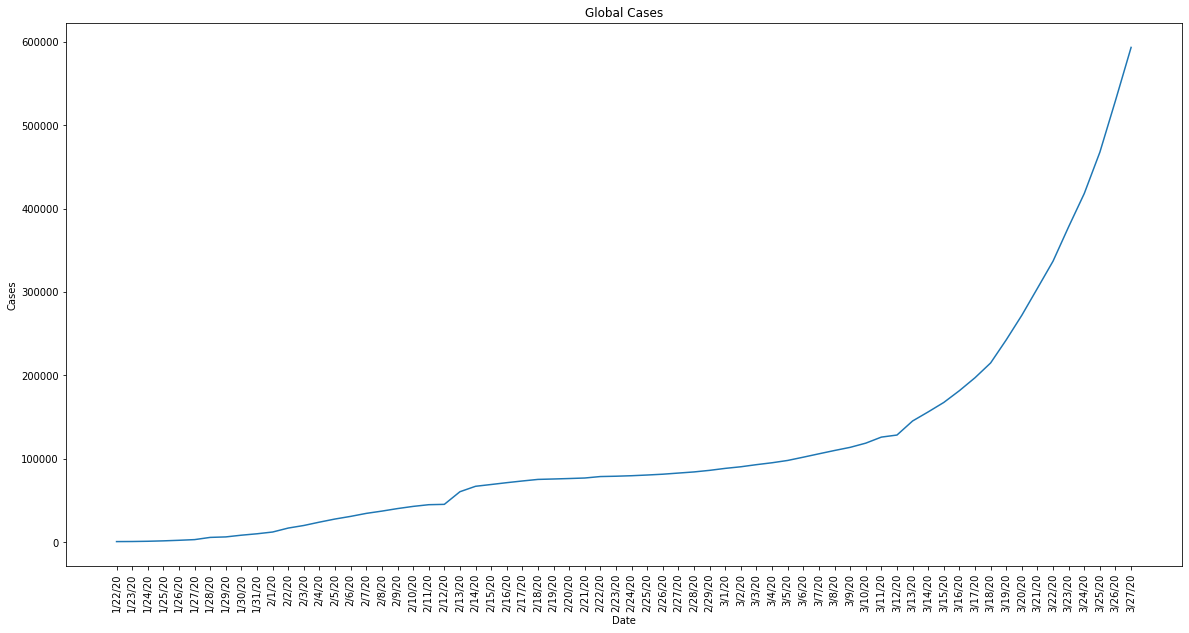

In [10]:
fig= plt.figure(figsize=(20,10))
plt.title('Global Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show

## Italy Cases

I think it would be worth it to explore how cases grew in Italy compared to global cases. Scientists have said again and again that the virus is most devastating towards the older population (60+). This is important as Italy has the 2nd largest population (percentage wise) of citizens 65+ in the world. Additionally, recent news reports that cases and deaths have gone up very quickly in Italy, going up hundreds overnight with record new highs for both new cases and deaths. These are my reasons for a deeper exploration.

In [11]:
dfItalyCase = dfConfirmed[dfConfirmed['Country/Region']=='Italy']
dfItalyCase = dfItalyCase.loc[:, '1/22/20':]
dfItalyCase.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
137,0,0,0,0,0,0,0,0,0,2,...,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498


In [12]:
x = dfItalyCase.columns.values
y = dfItalyCase.loc[137]

<function matplotlib.pyplot.show(*args, **kw)>

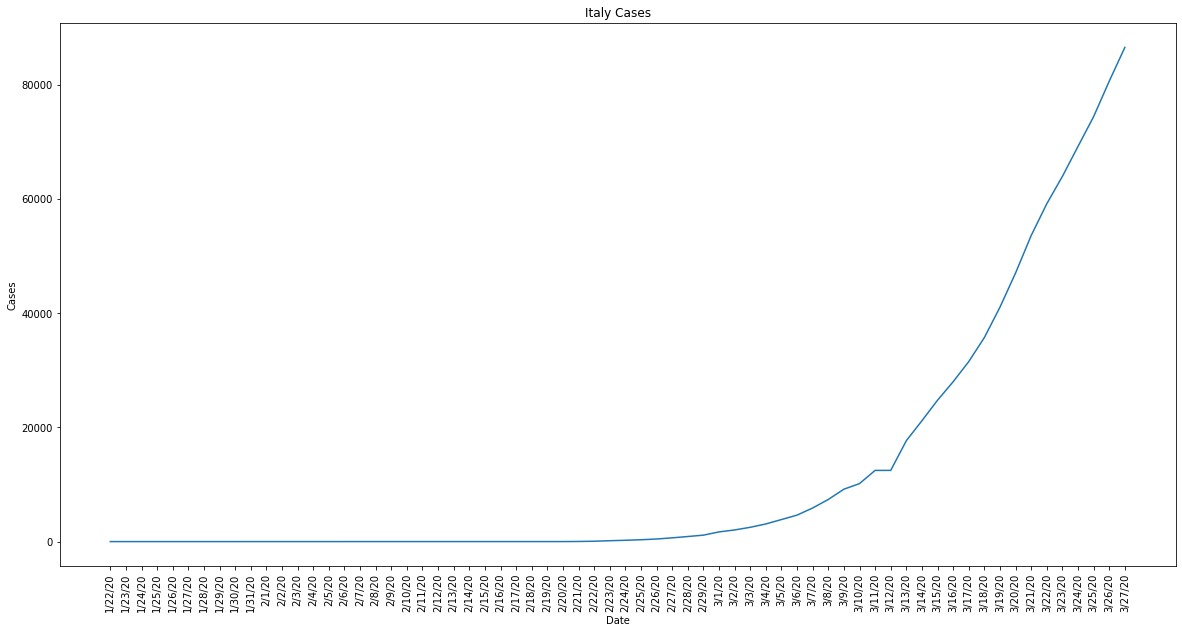

In [13]:
fig= plt.figure(figsize=(20,10))
plt.title('Italy Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show

## Japan Cases

I want to do a comparison with Japan and Italy because Japan has the world's largest population (percentage wise) of citizens 65+. This is important as Japan is not as badly affected as Italy even thought Japan is significantly closer to China with a larger percentage of older citizens

In [14]:
dfJapanCase = dfConfirmed[dfConfirmed['Country/Region']=='Japan']
dfJapanCase = dfJapanCase.loc[:, '1/22/20':]
dfJapanCase.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
139,2,2,2,2,4,4,7,7,11,15,...,889,924,963,1007,1101,1128,1193,1307,1387,1468


In [15]:
x = dfJapanCase.columns.values
y = dfJapanCase.loc[139]

<function matplotlib.pyplot.show(*args, **kw)>

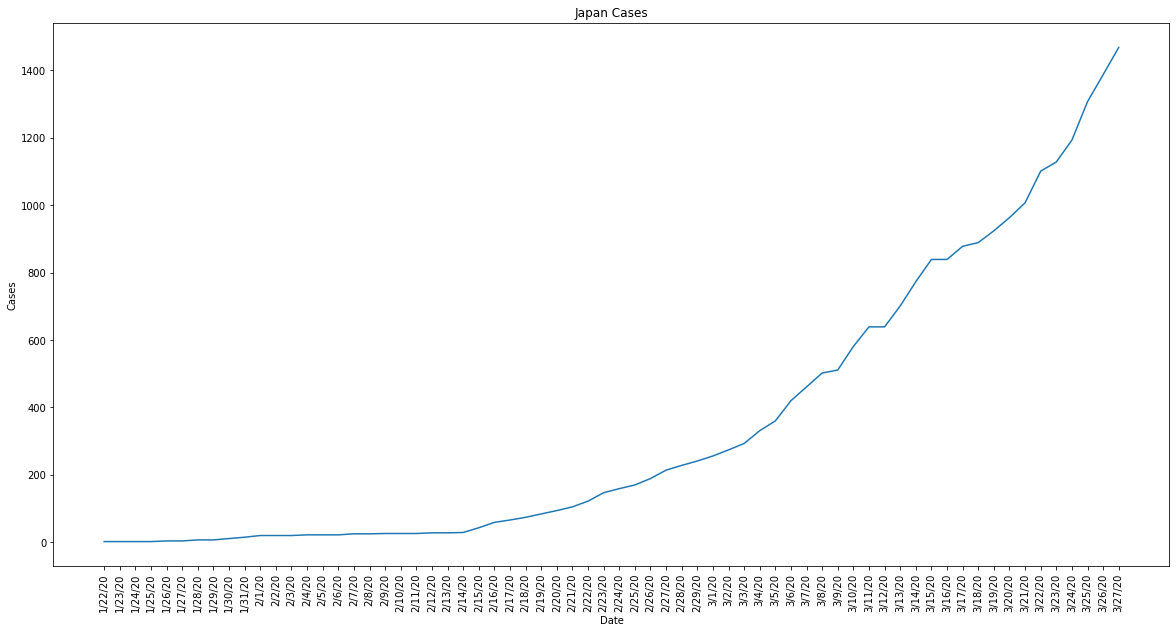

In [16]:
fig= plt.figure(figsize=(20,10))
plt.title('Japan Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show

## USA Cases

Good to know whats going on at home.

In [17]:
dfUSCase = dfConfirmed[dfConfirmed['Country/Region']=='US']
dfUSCase = dfUSCase.loc[:, '1/22/20':]
dfUSCase.loc['Sum Cases'] = dfUSCase.sum()
dfUSCase.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
225,1,1,2,2,5,5,5,5,5,7,...,7783,13677,19100,25489,33276,43847,53740,65778,83836,101657
Sum Cases,1,1,2,2,5,5,5,5,5,7,...,7783,13677,19100,25489,33276,43847,53740,65778,83836,101657


In [18]:
x = dfUSCase.columns.values
y = dfUSCase.loc['Sum Cases']

<function matplotlib.pyplot.show(*args, **kw)>

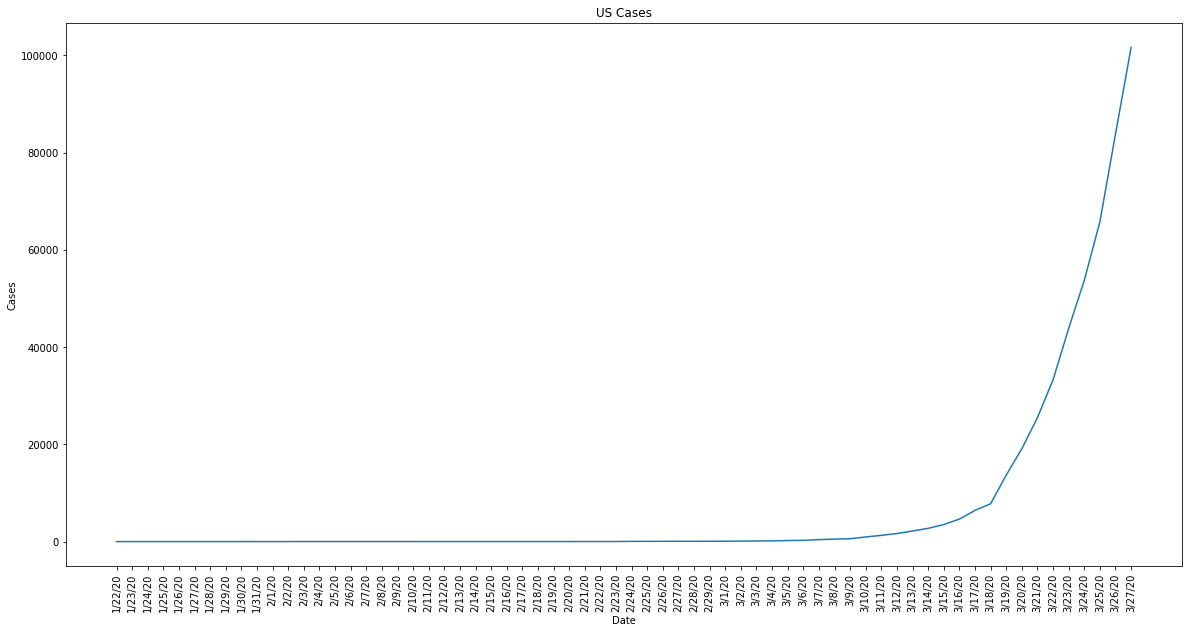

In [19]:
fig= plt.figure(figsize=(20,10))
plt.title('US Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show

## South Korea Cases

South Korea, based on news reports, has the most rigorous testing out of any country so far. So it would be interesting how their case and deaths moved.

In [20]:
dfSKoreaCase = dfConfirmed[dfConfirmed['Country/Region']=='Korea, South']
dfSKoreaCase = dfSKoreaCase.loc[:, '1/22/20':]
dfSKoreaCase.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
143,1,1,2,2,3,4,4,4,4,11,...,8413,8565,8652,8799,8961,8961,9037,9137,9241,9332


In [21]:
x = dfSKoreaCase.columns.values
y = dfSKoreaCase.loc[143]

<function matplotlib.pyplot.show(*args, **kw)>

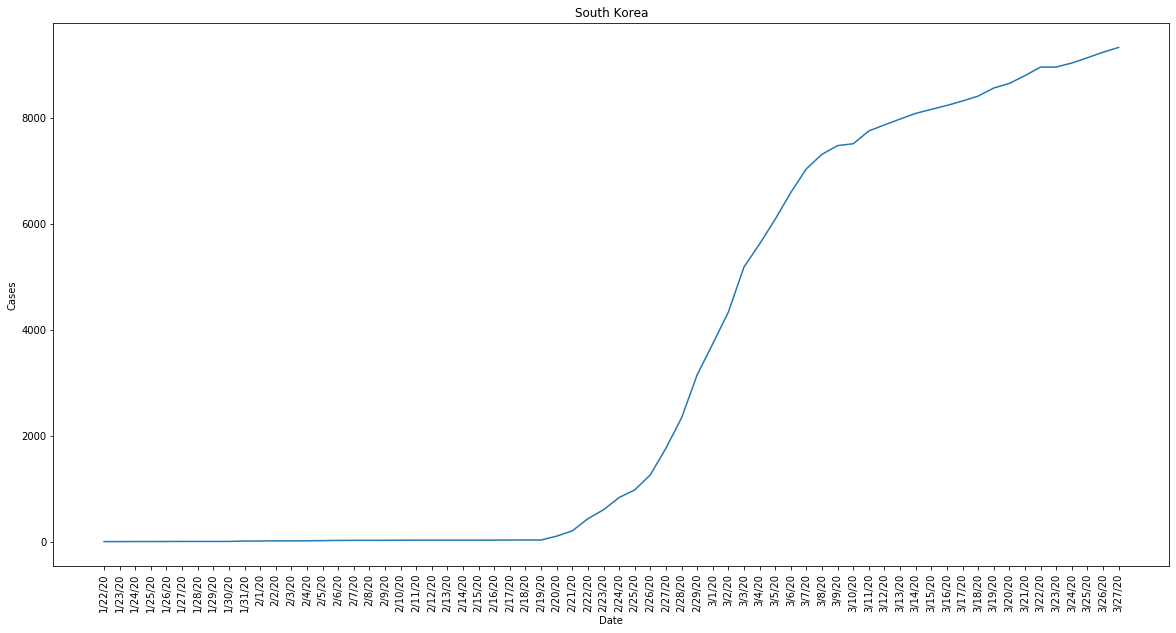

In [22]:
fig= plt.figure(figsize=(20,10))
plt.title('South Korea')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show

## China Cases

Coronavirus was first detected in Wuhan China. China has reported significantly low number of new cases. This could signal control of situation.

In [23]:
dfChinaCase = dfConfirmed[dfConfirmed['Country/Region']=='China']
dfChinaCase = dfChinaCase.loc[:, '1/22/20':]
dfChinaCase.loc['Sum Cases'] = dfChinaCase.sum()
dfChinaCase.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
78,0,0,0,0,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
79,0,2,2,3,4,5,10,13,14,17,...,76,76,76,76,76,76,76,76,76,76
80,1,2,5,11,16,26,44,55,70,83,...,176,176,176,176,176,176,176,176,178,180
81,10,27,43,62,104,128,173,296,428,538,...,1232,1233,1234,1236,1238,1238,1240,1241,1243,1247
Sum Cases,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81102,81156,81250,81305,81435,81498,81591,81661,81782,81897


In [24]:
x = dfChinaCase.columns.values
y = dfChinaCase.loc['Sum Cases']

<function matplotlib.pyplot.show(*args, **kw)>

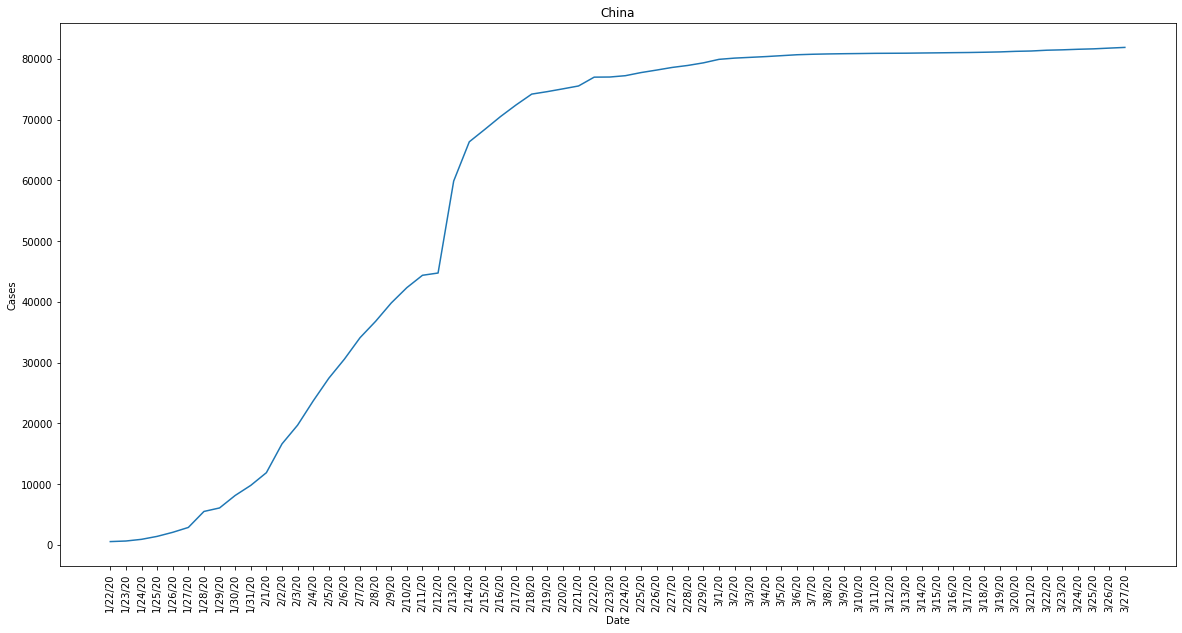

In [25]:
fig= plt.figure(figsize=(20,10))
plt.title('China')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show

## Case Comparisons: Italy Vs. Japan Vs. USA Vs. South Korea

In [26]:
x = dfglobal.columns.values
y1 = dfItalyCase.loc[137]
y2 = dfJapanCase.loc[139]
y3 = dfUSCase.loc['Sum Cases']
y4 = dfSKoreaCase.loc[143]
y5 = dfChinaCase.loc['Sum Cases']

<function matplotlib.pyplot.show(*args, **kw)>

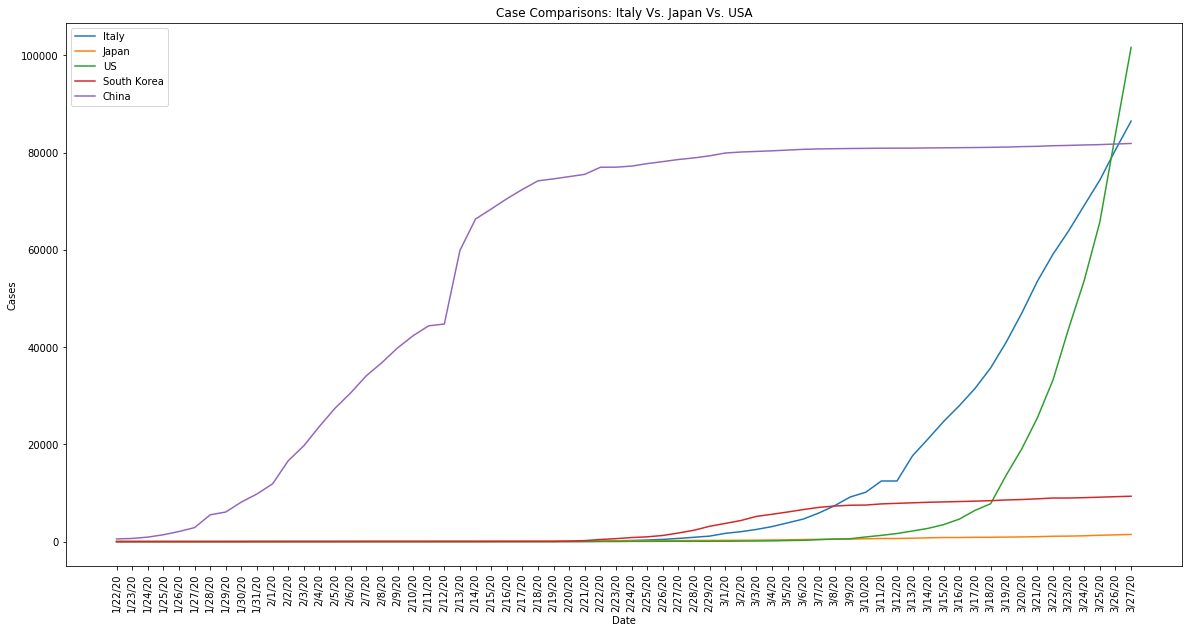

In [27]:
fig= plt.figure(figsize=(20,10))
plt.title('Case Comparisons: Italy Vs. Japan Vs. USA')
Italy = plt.plot(x,y1, label = 'Italy')
Japan = plt.plot(x,y2, label = 'Japan')
US = plt.plot(x,y3, label = 'US')
SouthKorea = plt.plot(x,y4, label = 'South Korea')
China = plt.plot(x,y5 , label = 'China')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show

In [28]:
#3/27/20 actual
print(dfglobal.at['Sum Cases','3/27/20'])

593291
